In [1]:
import numpy as np
import matplotlib.pylab as plt
from math import *
#from sklearn.models import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn import svm
import pandas as pd
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib notebook

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
RANDOM_SEED = 42
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
#HAPPY_COLORS_PALETTE = ['#01BEFE', '#FFDD00', '#FF7D00', '#FF006D', '#ADFF02', '#8F00FF']
#sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8


In [3]:
X = pd.read_csv('final_input_prep_30min.csv')
y = pd.read_csv('final_target_prep_30min.csv')

In [4]:
X.head()

,t-7,t-6,t-5,t-4,t-3,weekofyear,expanding_mean
0,5.35870,5.67445,5.888250,6.859950,7.393600,31,6.220370
1,10.33600,10.50200,5.955415,5.955415,5.955415,17,7.920289
2,8.46670,6.70895,3.859075,6.481100,4.476000,31,6.189347
3,3.98735,4.67095,4.583800,3.386050,3.695400,34,5.995986
4,7.80685,7.06745,6.071350,6.123900,7.344450,25,6.743004


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
Xtr = X[:500]
ytr = y[:500]
Xval = X[500:750]
yval = y[500:750]
Xte = X[750:1000]
yte = y[750:1000]

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
sc = MinMaxScaler()
sc.fit(Xtr)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [9]:
Xtr = pd.DataFrame(
    sc.transform(Xtr),
    columns=Xtr.columns
)
Xval = pd.DataFrame(
    sc.transform(Xval),
    columns=Xval.columns
)
Xte = pd.DataFrame(
    sc.transform(Xte),
    columns=Xte.columns
)

In [10]:
ytr.columns = ['t+1', 't+2', 't+3']
yval.columns = ['t+1', 't+2', 't+3']
yte.columns = ['t+1', 't+2', 't+3']

In [11]:
def f(p):
    gamma = np.power(10, p[0]).astype(float)
    sigma = np.power(10, p[1]).astype(float)
    
    reg = LSSVM(kernel='rbf', gamma=gamma, sigma=sigma)
    reg.fit(Xtr, ytr['t+1'])
    yp = reg.predict(Xval)
    return mse(yval['t+1'], yp)

In [12]:
from PSO import minimize_p
from QPSO import minimize_q
from EBQPSO import miniminze_eb
from LSSVMRegression import LSSVMRegression as LSSVM

In [13]:
from sklearn.metrics import mean_squared_error as mse

In [14]:
#initialisation of particles
N = 25 # number of particles
number_of_steps = 50

In [16]:
errs_best_p = minimize_p(f, [0, 0], [[-2, 3], [-2, 3]], N, number_of_steps)

1.2869703992649542
1.241316064504661
1.2241550925537321
1.205383776740964
1.202718798307087
1.2026781864720713
1.2026781864720713
1.2026781864720713
1.2025678351182145
1.2025188808614808
1.2024291573296586
1.2023287519180532
1.2023287519180532
1.2023287519180532
1.2023287519180532
1.2023287519180532
1.2023239138503936
1.2023205669938688
1.2023205669938688
1.2023205669938688
1.2023205669938688
1.2023205669938688
1.2023205669938688
1.2023205431576538
1.2023204553774673
1.2023204553774673
1.2023204553774673
1.2023204553774673
1.2023204553774673
1.2023204553774673
1.2023204521856103
1.2023204521856103
1.2023204508627636
1.2023204508627636
1.202320449195262
1.202320449195262
1.2023204488926054
1.2023204470576787
1.2023204470576787
1.2023204466597854
1.2023204466597854
1.2023204466597854
1.2023204465539399
1.2023204465464032
1.2023204465464032
1.2023204465445119
1.2023204465443769
1.2023204465443769
1.2023204465436839
1.2023204465436839


In [18]:
errs_best_q = minimize_q(f, N, -2, 3, number_of_steps)

Bzzz! New minimum found: 1.249001473807833
Bzzz! New minimum found: 1.249001473807833
Bzzz! New minimum found: 1.249001473807833
Bzzz! New minimum found: 1.249001473807833
Bzzz! New minimum found: 1.249001473807833
Bzzz! New minimum found: 1.249001473807833
Bzzz! New minimum found: 1.2359560036533794
Bzzz! New minimum found: 1.2287195026050097
Bzzz! New minimum found: 1.2228431088039842
Bzzz! New minimum found: 1.2228431088039842
Bzzz! New minimum found: 1.2148847763037018
Bzzz! New minimum found: 1.2143078211177618
Bzzz! New minimum found: 1.2084290180635089
Bzzz! New minimum found: 1.2024667585493922
Bzzz! New minimum found: 1.2024667585493922
Bzzz! New minimum found: 1.2023206627924694
Bzzz! New minimum found: 1.2023206618748186
Bzzz! New minimum found: 1.202320661869037
Bzzz! New minimum found: 1.2023206416728693
Bzzz! New minimum found: 1.2023206416728693
Bzzz! New minimum found: 1.2023206416728693
Bzzz! New minimum found: 1.2023206415187138
Bzzz! New minimum found: 1.202320641151

In [26]:
lamda = 5
jrate = 0.3
num_trans = 1

errs_best_eb, gbest_eb = miniminze_eb(f, N, number_of_steps, [-2, 3], lamda, jrate, num_trans)

/home/ephraim/stwsf/LSSVMRegression.py:224: RuntimeWarning: overflow encountered in double_scalars
  return np.exp(-(cdist(xi, xj, metric='sqeuclidean'))/(2*(sigma**2)))


KeyboardInterrupt: 

ValueError: setting an array element with a sequence.

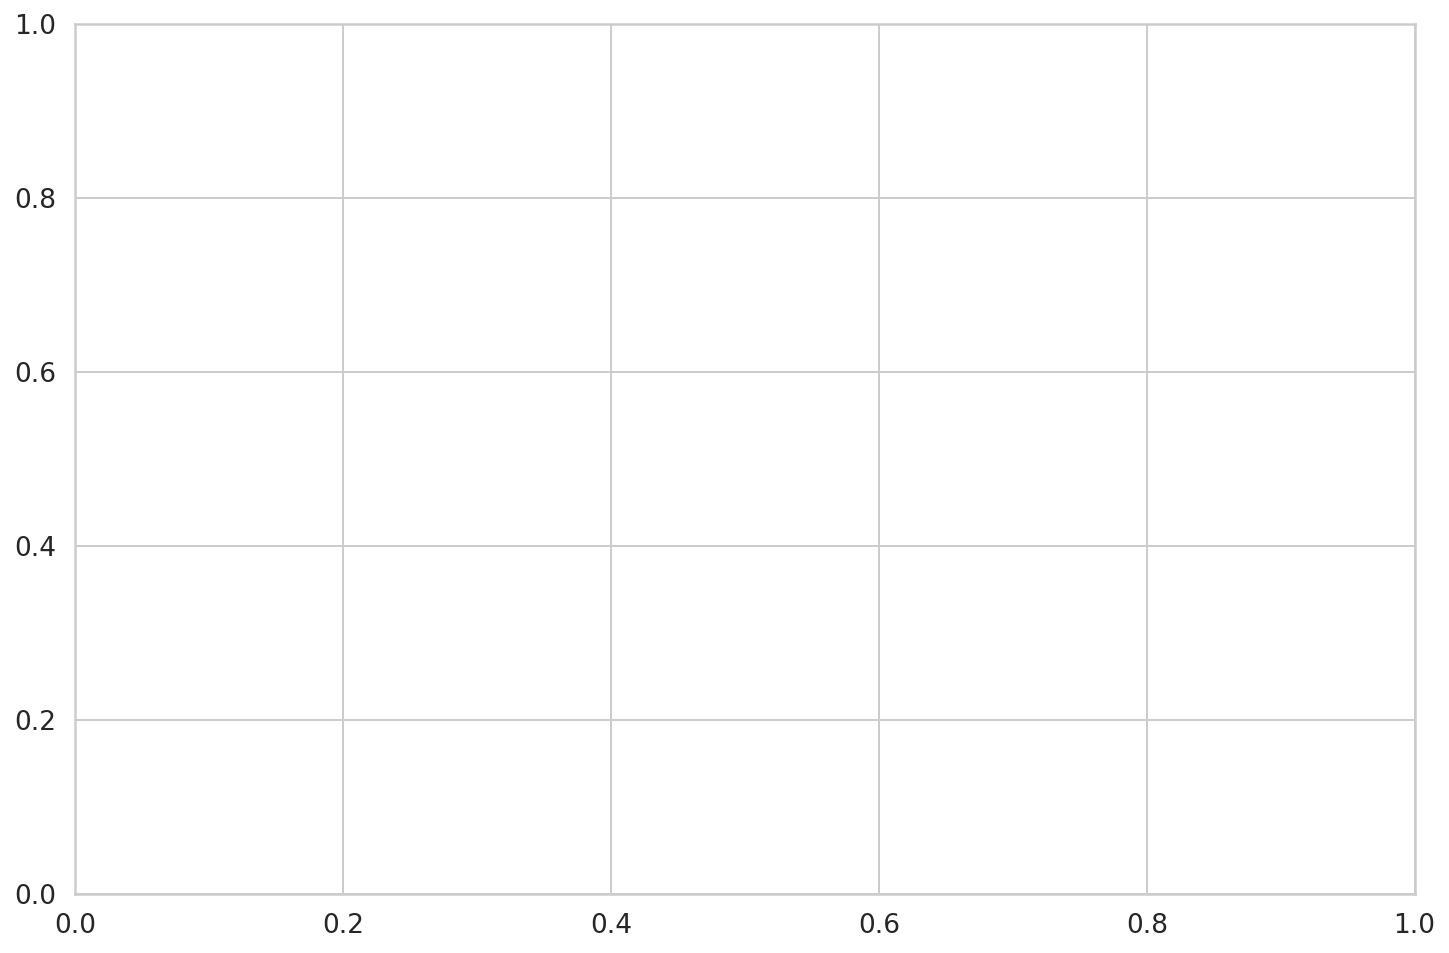

In [27]:
plt.plot(np.arange(len(errs_best_p))+1, errs_best_p)
plt.plot(np.arange(len(errs_best_q))+1, errs_best_q)
#plt.plot(np.arange(len(errs_best_eb))+1, errs_best_eb)

In [34]:
errs_best_pso = [1.5933804840313652, 1.5835729314586129, 1.5537769950148632, 1.549992829218592, 1.5456017640243669, 
             1.531256631113174, 1.5274194860529988, 1.5270965751797183, 1.5270965751797183, 1.52701500200267]

In [24]:
yerr = np.random.uniform(0.01, 0.02, len(errs_best))

<ErrorbarContainer object of 3 artists>

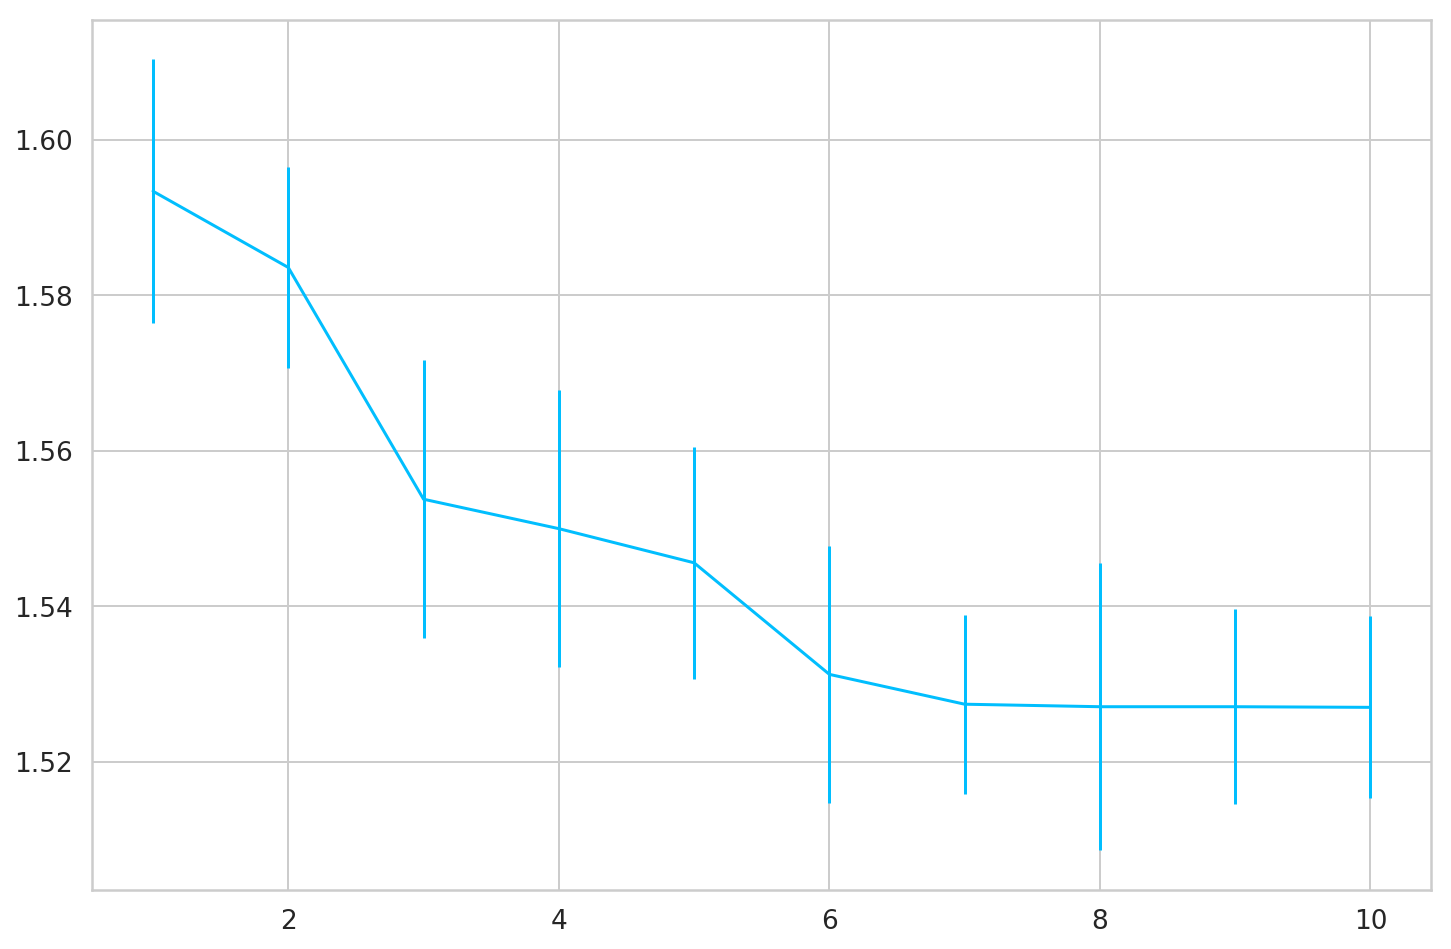

In [28]:
plt.errorbar(np.arange(len(errs_best))+1, errs_best, yerr=yerr)

In [35]:
from QPSO import minimize, Particle

In [36]:
minimize

<function QPSO.minimize(function, N, beg_, end_, number_of_steps=100)>

In [30]:
#initialisation of particles
N = 25 # number of particles


number_of_steps = 10

errs_best_q = minimize(f, N, -2, 3, number_of_steps)

Bzzz! New minimum found: 1.549862386987776
Bzzz! New minimum found: 1.549862386987776
Bzzz! New minimum found: 1.549862386987776
Bzzz! New minimum found: 1.5470940489829377
Bzzz! New minimum found: 1.5469755190565282
Bzzz! New minimum found: 1.5460838179818648
Bzzz! New minimum found: 1.5460838179818648
Bzzz! New minimum found: 1.5460838179818648
Bzzz! New minimum found: 1.5460838179818548
Bzzz! New minimum found: 1.545826053442093
Bzzz! New minimum found: 1.545653044095583
Bzzz! New minimum found: 1.545652641232058
Bzzz! New minimum found: 1.545652641232058


In [19]:
errs_best_q 

NameError: name 'errs_best_q' is not defined

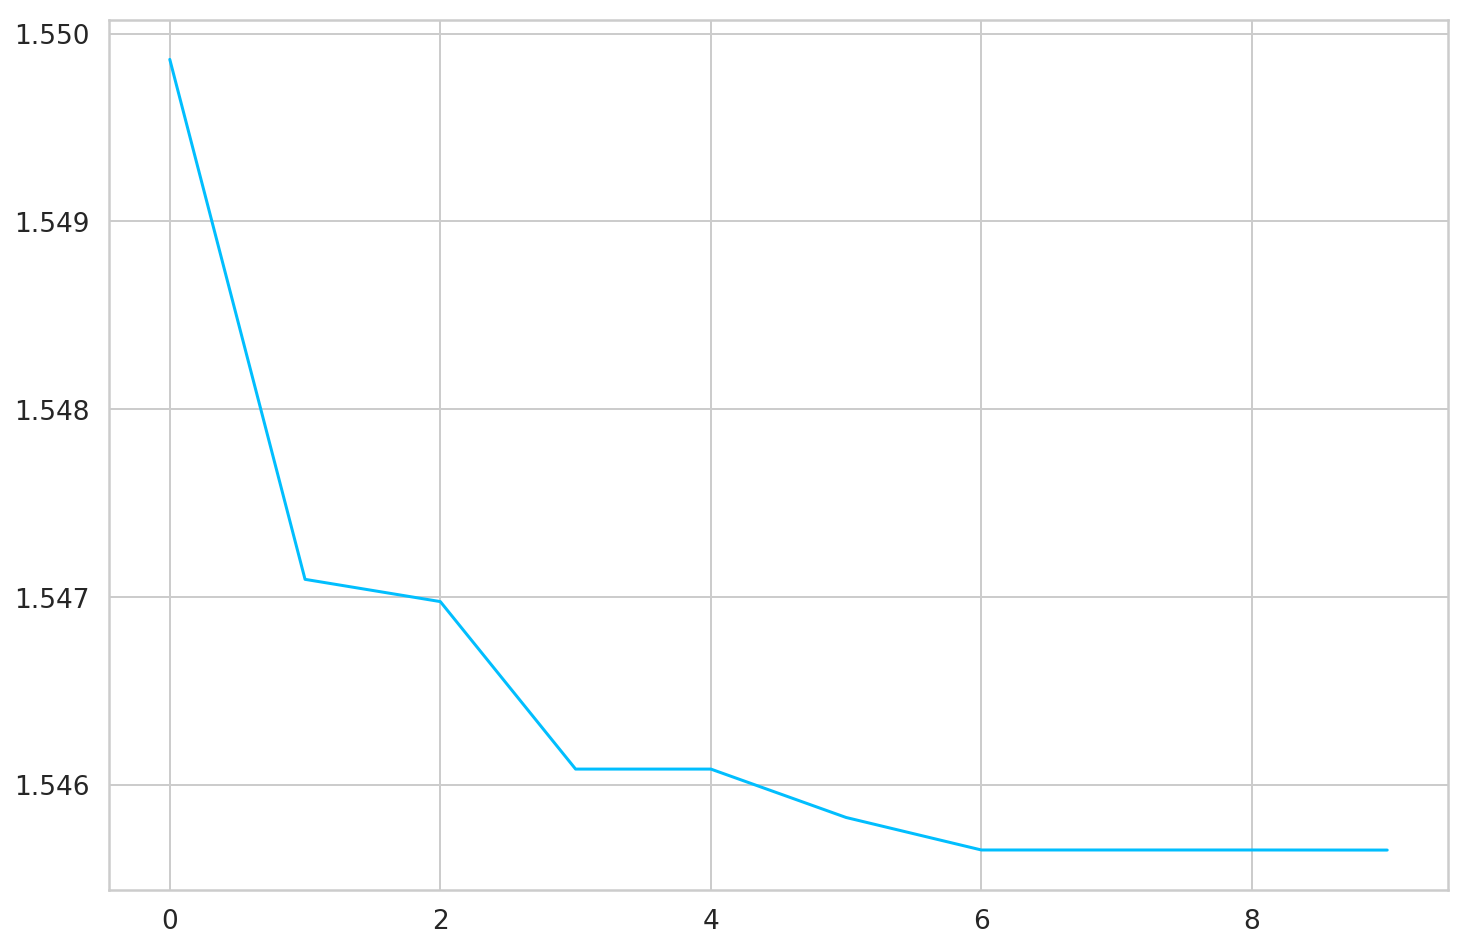

In [32]:
plt.plot(np.arange(len(errs_best_q)), errs_best_q)

In [14]:
from EBQPSO import Particle, miniminze

In [15]:
#initialisation of particles
N = 25 # number of particles


number_of_steps = 10
lamda = 5
jrate = 0.3
num_trans = 1

errs_best_eb, gbest_eb = miniminze(f, N, number_of_steps, [-2, 3], lamda, jrate, num_trans)

/home/ephraim/stwsf/LSSVMRegression.py:224: RuntimeWarning: overflow encountered in double_scalars
  return np.exp(-(cdist(xi, xj, metric='sqeuclidean'))/(2*(sigma**2)))
/home/ephraim/stwsf/LSSVMRegression.py:224: RuntimeWarning: overflow encountered in true_divide
  return np.exp(-(cdist(xi, xj, metric='sqeuclidean'))/(2*(sigma**2)))


In [16]:
errs_best_eb

[1.2087512916445908,
 1.2087512916445908,
 1.2087512916445908,
 1.203073256047086,
 1.203073256047086,
 1.203073256047086,
 1.203073256047086,
 1.203073256047086,
 1.203073256047086,
 1.203073256047086,
 1.203073256047086,
 1.203073256047086,
 1.203073256047086,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1.2025032926062484,
 1

In [17]:
gbest_eb

array([1.66742065, 0.73695498])

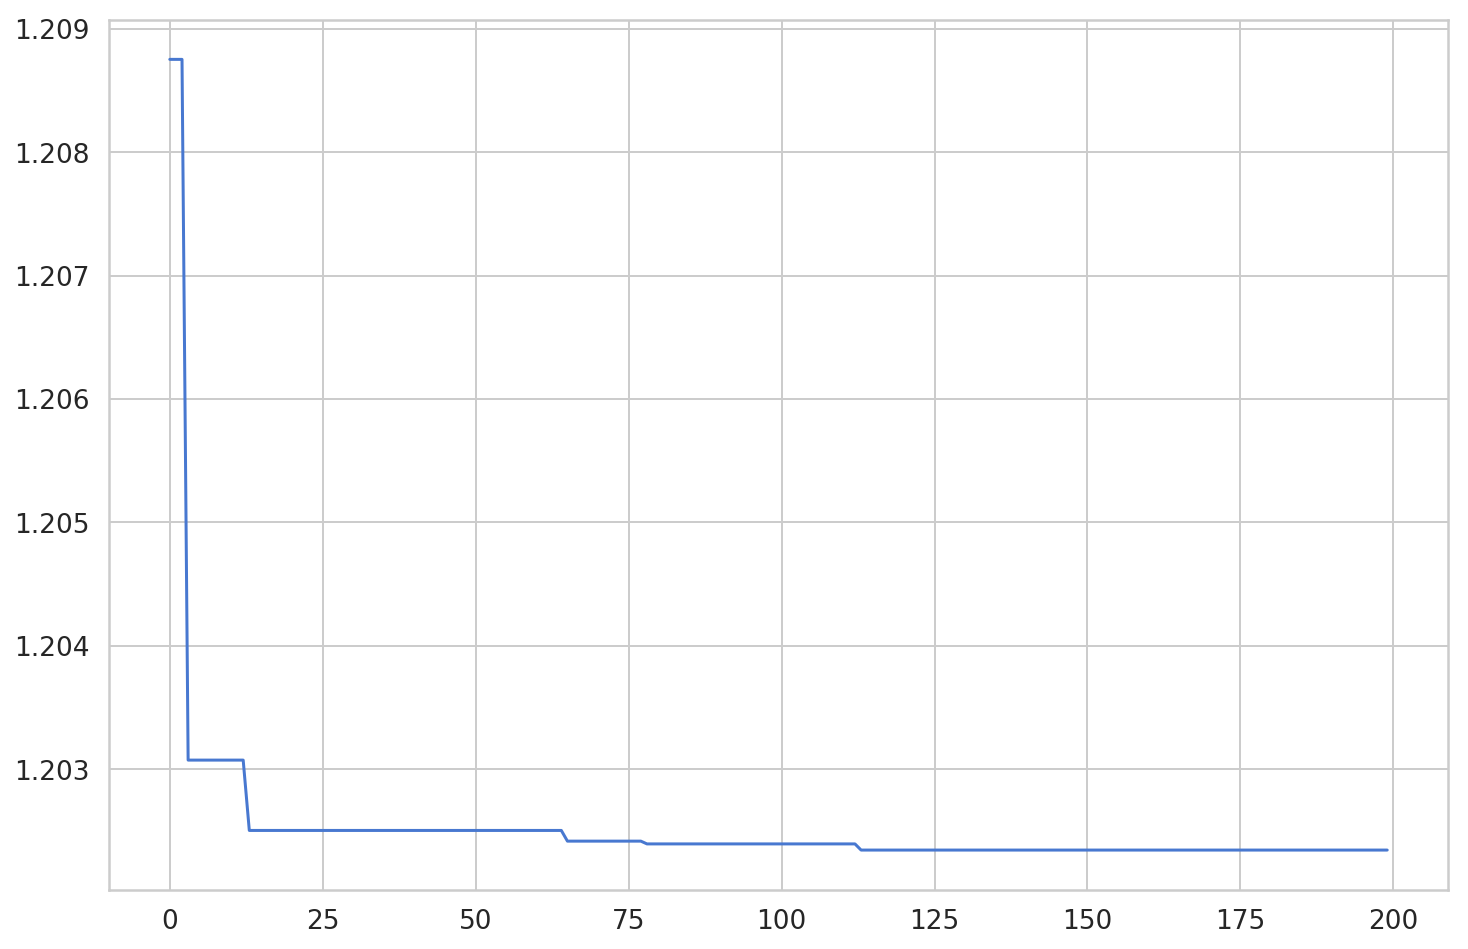

In [19]:
plt.plot(np.arange(len(errs_best_eb)), errs_best_eb)